# Data Description

Give a brief description of the dataset you are using:

The dataset describes the ecological footprint for 196 countries over a different range of years for each country. The data has 5 record types - Biocapacity (Biocap), Ecological Footprint Exports, Inports, Produced, Consumed (EFExports, EFImports, EFProd, EFCons) - and each record type has two possible measures - global hectares per capita (PerCap) and total global hectares (TotGHA), for a total of 10 record types.

As quoted from the kaggle dataset data summary:
"The columns "crop_land" through "carbon" are the number of global hectares of this landtype either required to support consumption/production (Ecological Footprint of Consumption, Production), or that are supported by biological productivity (Biocapacity). The "total" column is the sum of these values."

The dataset also includes the country's per capita GDP and population for each year.

The link to the dataset is here: https://www.kaggle.com/footprintnetwork/national-footprint-accounts-2018

Note that I have renamed the csv post-download from 'NFA 2018.csv' to 'NFA_2018.csv' to ensure no path confusion.

In [1]:
import pandas as pd

results = pd.read_csv("data/NFA_2018.csv")
results.head(20)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
5,Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3.880378e+03,7875.331688,0.000000,1512.195296,0.000000,1.662329e+05,1.795008e+05,949.033,3449000
6,Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,2.309189e-01,0.056397,0.000001,0.003312,0.000000,8.791121e-02,3.785406e-01,949.033,3449000
7,Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,7.965547e+05,194541.060900,4.327841,11426.058040,0.000000,3.032497e+05,1.305776e+06,949.033,3449000
8,Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,1.611286e-01,0.135023,0.000000,0.001264,0.033669,1.072504e+00,1.403588e+00,949.033,3449000
9,Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,5.558130e+05,465763.337400,0.000000,4358.940944,116139.598200,3.699604e+06,4.841678e+06,949.033,3449000


---

# Dialogue Model Training

Train the RASA dialogue model using your training data and the code from the lab notebook. Feel free to add code/markdown cells as needed.

## Train NLU Component

In [2]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

import sys
!{sys.executable} -m spacy download en

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))


    Linking successful
    C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\en_core_web_sm
    -->
    C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\spacy\data\en

    You can now load the model via spacy.load('en')



C:\Anaconda\envs\mie451-assignment-ci\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Anaconda\envs\mie451-assignment-ci\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


### Train NLU Model

In [3]:
from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu_data/intents.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data, verbose=True)

# store it for future use
model_directory = trainer.persist("models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu_data/intents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 78 (9 distinct intents)
	- Found intents: 'goodbye', 'presence_check', 'affirm', 'results_query', 'deny', 'summary_query', 'inform', 'greet', 'thanks'
	- entity examples: 25 (4 distinct entities)
	- found entities: 'year_range', 'year', 'record', 'country'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_entity_featurizer_r

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into 'c:\mie451\assignment-cai-nicolwon\assignment\models\nlu\default\current'


### Use and Evaluate NLU Model

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu_data/intents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 78 (9 distinct intents)
	- Found intents: 'goodbye', 'presence_check', 'affirm', 'results_query', 'deny', 'summary_query', 'inform', 'greet', 'thanks'
	- entity examples: 25 (4 distinct entities)
	- found entities: 'year_range', 'year', 'record', 'country'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 78 examples that have a defined intent out of 78 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9871794871794872
INFO:rasa_nlu.evaluate:Precision: 0.9881656804733728
INFO:rasa_nlu.evaluate:Accuracy:  0.9871794871794872
INFO:rasa_nlu.evaluate:Classification report: 
                precision    recall  f1-score   support

        affirm       1.00      1.00      1.00        

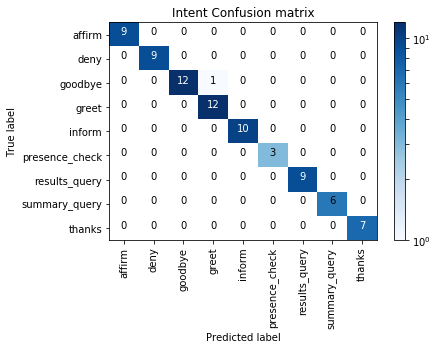

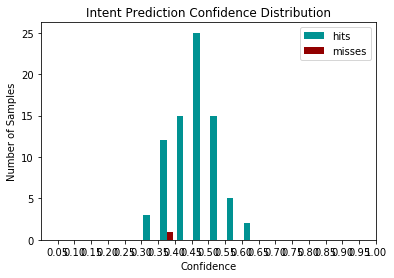

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

    country       1.00      1.00      1.00        19
  no_entity       1.00      1.00      1.00       211
     record       1.00      1.00      1.00         6
       year       1.00      1.00      1.00         6
 year_range       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00       251



In [4]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("nlu_data/intents.md", model_directory)

## Handling Dialogue

In [5]:
from rasa_core.policies import KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent
from rasa_core.policies.fallback import FallbackPolicy

fallback = FallbackPolicy(fallback_action_name="action_default_fallback",
                          core_threshold=0.2,
                          nlu_threshold=0.2)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

# loading our training dialogues
training_data = agent.load_data('nlu_data/stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist('models/dialogue')

INFO:apscheduler.scheduler:Scheduler started
C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\pykwalify\core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|████████████████████████████████████████████| 14/14 [00:00<00:00, 71.05it/s, # trackers=8]
Processed actions: 788it [00:03, 211.09it/s, # examples=788]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 33)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8448      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
activation (Activation)      (None, 16)                0         
Total params: 8,976
Trainable params: 8,976
Non-trainable params: 0
_________________________________________________________________


INFO:rasa_core.policies.keras_policy:Fitting model with 788 total samples and a validation split of 0.0


Epoch 1/200
788/788 [==============================] - ETA: 29s - loss: 2.7462 - acc: 0.06 - ETA: 5s - loss: 2.7172 - acc: 0.1437 - ETA: 4s - loss: 2.7055 - acc: 0.182 - ETA: 2s - loss: 2.6555 - acc: 0.281 - ETA: 1s - loss: 2.6223 - acc: 0.336 - ETA: 0s - loss: 2.5811 - acc: 0.373 - ETA: 0s - loss: 2.5352 - acc: 0.387 - ETA: 0s - loss: 2.5286 - acc: 0.387 - 2s 2ms/step - loss: 2.5205 - acc: 0.3883
Epoch 2/200
788/788 [==============================] - ETA: 0s - loss: 2.2022 - acc: 0.531 - ETA: 0s - loss: 2.2738 - acc: 0.437 - ETA: 0s - loss: 2.2707 - acc: 0.425 - ETA: 0s - loss: 2.2612 - acc: 0.420 - ETA: 0s - loss: 2.2295 - acc: 0.432 - ETA: 0s - loss: 2.1944 - acc: 0.439 - ETA: 0s - loss: 2.1616 - acc: 0.443 - ETA: 0s - loss: 2.1471 - acc: 0.447 - 0s 538us/step - loss: 2.1269 - acc: 0.4518
Epoch 3/200
788/788 [==============================] - ETA: 0s - loss: 2.0251 - acc: 0.500 - ETA: 0s - loss: 2.0674 - acc: 0.445 - ETA: 0s - loss: 2.0399 - acc: 0.450 - ETA: 0s - loss: 2.1135 - acc

788/788 [==============================] - ETA: 0s - loss: 0.4507 - acc: 0.937 - ETA: 0s - loss: 0.2367 - acc: 0.960 - ETA: 0s - loss: 0.1839 - acc: 0.972 - ETA: 0s - loss: 0.1728 - acc: 0.975 - ETA: 0s - loss: 0.1986 - acc: 0.966 - ETA: 0s - loss: 0.1990 - acc: 0.961 - ETA: 0s - loss: 0.2017 - acc: 0.957 - 0s 490us/step - loss: 0.1974 - acc: 0.9581
Epoch 49/200
788/788 [==============================] - ETA: 0s - loss: 0.1029 - acc: 1.000 - ETA: 0s - loss: 0.1639 - acc: 0.958 - ETA: 0s - loss: 0.1648 - acc: 0.959 - ETA: 0s - loss: 0.1892 - acc: 0.952 - ETA: 0s - loss: 0.1974 - acc: 0.950 - 0s 357us/step - loss: 0.1911 - acc: 0.9556
Epoch 50/200
788/788 [==============================] - ETA: 0s - loss: 0.0956 - acc: 1.000 - ETA: 0s - loss: 0.1748 - acc: 0.963 - ETA: 0s - loss: 0.1475 - acc: 0.965 - ETA: 0s - loss: 0.1578 - acc: 0.966 - ETA: 0s - loss: 0.1545 - acc: 0.965 - 0s 359us/step - loss: 0.1618 - acc: 0.9645
Epoch 51/200
788/788 [==============================] - ETA: 0s - loss

Epoch 72/200
788/788 [==============================] - ETA: 0s - loss: 0.0499 - acc: 1.000 - ETA: 0s - loss: 0.1329 - acc: 0.958 - ETA: 0s - loss: 0.1379 - acc: 0.954 - ETA: 0s - loss: 0.1277 - acc: 0.957 - ETA: 0s - loss: 0.1336 - acc: 0.958 - 0s 346us/step - loss: 0.1290 - acc: 0.9607
Epoch 73/200
788/788 [==============================] - ETA: 0s - loss: 0.0615 - acc: 1.000 - ETA: 0s - loss: 0.1163 - acc: 0.959 - ETA: 0s - loss: 0.1092 - acc: 0.971 - ETA: 0s - loss: 0.1086 - acc: 0.972 - ETA: 0s - loss: 0.1070 - acc: 0.974 - 0s 345us/step - loss: 0.1109 - acc: 0.9721
Epoch 74/200
788/788 [==============================] - ETA: 0s - loss: 0.0749 - acc: 1.000 - ETA: 0s - loss: 0.0750 - acc: 0.993 - ETA: 0s - loss: 0.0831 - acc: 0.988 - ETA: 0s - loss: 0.0973 - acc: 0.981 - ETA: 0s - loss: 0.1048 - acc: 0.974 - ETA: 0s - loss: 0.1234 - acc: 0.962 - ETA: 0s - loss: 0.1236 - acc: 0.961 - ETA: 0s - loss: 0.1180 - acc: 0.964 - 0s 581us/step - loss: 0.1165 - acc: 0.9645
Epoch 75/200
788/78

Epoch 95/200
788/788 [==============================] - ETA: 0s - loss: 0.0844 - acc: 0.968 - ETA: 0s - loss: 0.0835 - acc: 0.968 - ETA: 0s - loss: 0.0894 - acc: 0.975 - ETA: 0s - loss: 0.1034 - acc: 0.972 - ETA: 0s - loss: 0.1009 - acc: 0.975 - ETA: 0s - loss: 0.0955 - acc: 0.975 - 0s 397us/step - loss: 0.0920 - acc: 0.9772
Epoch 96/200
788/788 [==============================] - ETA: 0s - loss: 0.1251 - acc: 0.968 - ETA: 0s - loss: 0.0746 - acc: 0.968 - ETA: 0s - loss: 0.0623 - acc: 0.981 - ETA: 0s - loss: 0.0742 - acc: 0.968 - ETA: 0s - loss: 0.0954 - acc: 0.963 - ETA: 0s - loss: 0.1038 - acc: 0.962 - ETA: 0s - loss: 0.1138 - acc: 0.959 - ETA: 0s - loss: 0.1126 - acc: 0.962 - ETA: 0s - loss: 0.1121 - acc: 0.964 - 0s 623us/step - loss: 0.1123 - acc: 0.9632
Epoch 97/200
788/788 [==============================] - ETA: 0s - loss: 0.1865 - acc: 0.937 - ETA: 0s - loss: 0.0819 - acc: 0.976 - ETA: 0s - loss: 0.0860 - acc: 0.982 - ETA: 0s - loss: 0.0914 - acc: 0.978 - ETA: 0s - loss: 0.0996 -

Epoch 118/200
788/788 [==============================] - ETA: 0s - loss: 0.2287 - acc: 0.906 - ETA: 0s - loss: 0.0803 - acc: 0.979 - ETA: 0s - loss: 0.0780 - acc: 0.981 - ETA: 0s - loss: 0.0750 - acc: 0.982 - ETA: 0s - loss: 0.0729 - acc: 0.982 - ETA: 0s - loss: 0.0710 - acc: 0.983 - 0s 448us/step - loss: 0.0702 - acc: 0.9848
Epoch 119/200
788/788 [==============================] - ETA: 0s - loss: 0.0137 - acc: 1.000 - ETA: 0s - loss: 0.0553 - acc: 0.989 - ETA: 0s - loss: 0.0560 - acc: 0.987 - ETA: 0s - loss: 0.0577 - acc: 0.983 - ETA: 0s - loss: 0.0582 - acc: 0.982 - ETA: 0s - loss: 0.0569 - acc: 0.983 - ETA: 0s - loss: 0.0578 - acc: 0.984 - 0s 468us/step - loss: 0.0582 - acc: 0.9848
Epoch 120/200
788/788 [==============================] - ETA: 0s - loss: 0.0452 - acc: 1.000 - ETA: 0s - loss: 0.0495 - acc: 0.992 - ETA: 0s - loss: 0.0497 - acc: 0.988 - ETA: 0s - loss: 0.0472 - acc: 0.989 - ETA: 0s - loss: 0.0540 - acc: 0.987 - ETA: 0s - loss: 0.0555 - acc: 0.987 - ETA: 0s - loss: 0.058

788/788 [==============================] - ETA: 0s - loss: 0.1077 - acc: 0.968 - ETA: 0s - loss: 0.0465 - acc: 0.989 - ETA: 0s - loss: 0.0498 - acc: 0.987 - ETA: 0s - loss: 0.0486 - acc: 0.988 - ETA: 0s - loss: 0.0431 - acc: 0.991 - ETA: 0s - loss: 0.0449 - acc: 0.990 - 0s 378us/step - loss: 0.0437 - acc: 0.9911
Epoch 172/200
788/788 [==============================] - ETA: 0s - loss: 0.0057 - acc: 1.000 - ETA: 0s - loss: 0.0245 - acc: 0.994 - ETA: 0s - loss: 0.0287 - acc: 0.994 - ETA: 0s - loss: 0.0418 - acc: 0.990 - ETA: 0s - loss: 0.0365 - acc: 0.992 - 0s 348us/step - loss: 0.0380 - acc: 0.9911
Epoch 173/200
788/788 [==============================] - ETA: 0s - loss: 0.0291 - acc: 1.000 - ETA: 0s - loss: 0.0582 - acc: 0.979 - ETA: 0s - loss: 0.0552 - acc: 0.983 - ETA: 0s - loss: 0.0518 - acc: 0.984 - ETA: 0s - loss: 0.0537 - acc: 0.983 - 0s 357us/step - loss: 0.0499 - acc: 0.9848
Epoch 174/200
788/788 [==============================] - ETA: 0s - loss: 0.0135 - acc: 1.000 - ETA: 0s - l

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to 'c:\mie451\assignment-cai-nicolwon\assignment\models\dialogue'


---
# Interaction Demo

Provide the required sections as described in the handout.

Start action server: python -m rasa_core_sdk.endpoint --actions actions

In [6]:
import IPython
from IPython.display import clear_output
from rasa_core.agent import Agent
from rasa_core.interpreter import NaturalLanguageInterpreter
from rasa_core.utils import EndpointConfig

messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


{'sender_id': 'sender_id',
 'slots': {'country': None, 'record': None, 'year': None, 'year_range': None},
 'latest_message': {'intent': {}, 'entities': [], 'text': None},
 'latest_event_time': 1543558863.216981,
 'followup_action': None,
 'paused': False,
 'events': None,
 'latest_input_channel': None}

## Q1

Any simple one-step interaction requiring at least one slot filler.

a) 
Query - intent:presence_check - check if the dataset has data on a certain country

Slot fillers required - country

Supported paths - presence_check --> thanks --> goodbye

b)
#### nlu_data/intents.md

intent:presence_check
- ecological footprint data on [China](country)?
- is there info on [Pakistan](country)?
- are there measures on [Zimbabwe](country)'s ecological footprint?

intent:thanks
- thanks
- thank you
- thank you very much
- thanks a lot
- thank you so much
- thank you loads
- tnx

intent:goodbye
- see you
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later
- good bye
- stop

#### nlu_data/stories.md

Thanks
* thanks
    - utter_np

Goodbye
* goodbye
    - utter_goodbye
    - action_restart

Fallback
* fallback
    - utter_fallback

Path 6
* presence_check{"country": "Latvia"}
    - action_check_presence
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart

#### actions.py

class PresenceAction(Action):
    def name(self):
        return "action_check_presence"
    
    def run(self, dispatcher, tracker, domain):
        country = tracker.get_slot('country')
        print(country)

        presence = len(data[data.country.str.lower() == country.lower()]) > 0

        if presence is True:
            dispatcher.utter_message("There exists data for {}'s ecological footprint!".format(country))
        else:
            dispatcher.utter_message("There is no data on {}'s ecological footprint!".format(country))

#### domain.yml

intents: 
- presence_check

slots:
  
  country:
    type: text
    
entities:
  - country
  
actions:
  - action_check_presence
  - utter_np
  - utter_goodbye
  
templates:

utter_goodbye:
  - text: "Bye!"

utter_np:
  - text: "No Problem"

In [7]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
hi
{
  "intent": {
    "name": "greet",
    "confidence": 0.42163502795040275
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "greet",
      "confidence": 0.42163502795040275
    },
    {
      "name": "affirm",
      "confidence": 0.20830170103754486
    },
    {
      "name": "goodbye",
      "confidence": 0.14314926737283978
    },
    {
      "name": "deny",
      "confidence": 0.11499450165803082
    },
    {
      "name": "thanks",
      "confidence": 0.05225639419035842
    },
    {
      "name": "inform",
      "confidence": 0.024826912344413987
    },
    {
      "name": "results_query",
      "confidence": 0.013213800036242226
    },
    {
      "name": "presence_check",
      "confidence": 0.011523950724546171
    },
    {
      "name": "summary_query",
      "confidence": 0.0100984446856201
    }
  ],
  "text": "hi"
}
Hey!!
is there info on kenya?
{
  "intent": {
    "name": "presence_check",

### Q2

A different interaction that contains at least one slot filler and at least two paths (possible
branches in the interaction sequence).

a) 
Query - intent:results_query - Retrieve the total hectares consumed/produced by a country's ecological footprint in a specific year and from a specific record type. The data has 5 record types - Biocapacity (Biocap), Ecological Footprint Exports, Inports, Produced, Consumed (EFExports, EFImports, EFProd, EFCons) - and each record type has two possible measures - global hectares per capita (PerCap) and total global hectares (TotGHA).

Slot fillers required - country, year, record

Supported paths 
- results_query(country, year, record) --> thanks --> goodbye
- results_query --> inform(country) --> inform(year) --> inform(record) --> thanks --> goodbye
- results_query(country) --> inform(year) --> inform(record) --> thanks --> goodbye
- results_query(year) --> inform(country) --> inform(record) --> thanks --> goodbye
- results_query(country, year) --> inform(record) --> thanks --> goodbye
- results_query(record, year) --> inform(country) --> thanks --> goodbye

b)
#### nlu_data/intents.md

intent:results_query
- give me the [EFConsTotGHA](record) results for [Russia](country) in [1996](year)
- do you have record data on [Brazil](country)
- do you know about [Egypt](country)
- how many hectares did [New Zealand](country) consume in [2004](year)?
- what was the [BioCapTotGHA](record) for [country]?
- what was the [EFProdPerCap](record) footprint in [2007](year) for [Australia](country)?
- I want information for [Serbia](country)
- data for [Spain](country)
- [EFImportsPerCap](record) footprint in [1998](year)

intent:inform
- I want to know about [France](country)
- [Japan](country)
- [1992](year)
- [BiocapPerCap](record)
- [EFExportsTotGHA](record)
- [2001](year)
- [South Korea](country)
- [1990-1993](year_range)
- [1970-1986](year_range)
- [Malaysia](country)

intent:thanks
- thanks
- thank you
- thank you very much
- thanks a lot
- thank you so much
- thank you loads
- tnx

intent:goodbye
- see you
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later
- good bye
- stop

#### nlu_data/stories.md

Thanks
* thanks
    - utter_np

Goodbye
* goodbye
    - utter_goodbye
    - action_restart

Fallback
* fallback
    - utter_fallback

Path 1
* greet
    - utter_greet
* results_query
    - utter_what_country
* inform{"country":"china"}
    - utter_what_year
* inform{"year":"2001"}
    - utter_what_record
* inform{"record":"EFImportsPerCap"}
    - action_get_results
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart

Path 2 
* results_query{"country": "venezuela"}
    - utter_what_year
* inform{"year":"2001"}
    - utter_what_record
* inform{"record":"EFImportsPerCap"}
    - action_get_results
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart
    
Path 3 
* results_query{"record": "EFExportsPerCap"}
    - utter_what_country
* inform{"country": "Chile"}
    - utter_what_year
* inform{"year":"2002"}
    - action_get_results
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart
    
Path 4 
* results_query{"country": "venezuela", "year": "1998"}
    - utter_what_record
* inform{"record":"EFImportsPerCap"}
    - action_get_results
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart

Path 5 
* results_query{"record": "EFProdTotGHA", "year": "1998"}
    - utter_what_country
* inform{"country":"Kenya"}
    - action_get_results
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart

Path 7
* results_query{"country": "Portugal", "year": "1996", "record": "EFProdPerCap"}
    - action_get_results
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart

#### actions.py

data = pd.read_csv("data/NFA_2018.csv").astype(str)

record_dict = {'biocappercap': 'Biocapacity per capita',
               'biocaptotgha': 'Biocapacity in total global hectares',
               'efconspercap': 'Ecological Footprint Consumption per capita',
               'efconstotgha': 'Ecological Footprint Consumption in total global hectares',
               'efprodpercap': 'Ecological Footprint Production per capita',
               'efprodtotgha': 'Ecological Footprint Production in total global hectares',
               'efexportspercap': 'Ecological Footprint Exports per capita',
               'efexportstotgha': 'Ecological Footprint Exports in total global hectares',
               'efimportspercap': 'Ecological Footprint Imports per capita',
               'efimportstotgha': 'Ecological Footprint Imports in total global hectares'}

class WinsAction(Action):
    def name(self):
        return "action_get_results"

    def run(self, dispatcher, tracker, domain):
        country = tracker.get_slot('country')
        year = tracker.get_slot('year')
        record = tracker.get_slot('record')
        
        results = data[(data.country.str.lower() == country.lower()) & (data.record.str.lower() == record.lower()) & (data.year.str.lower() == year.lower())]
        
        dispatcher.utter_message("{} for {} in {} was {} hectares.".format(record_dict[record], country, year, np.asscalar(results.total)))

#### domain.yml

intents: 
- greet 
- goodbye
- affirm
- deny
- thanks
- inform
- summary_query

slots:

  country:
    type: text
    
  year_range:
    type: text

    
entities:
  - country
  - year_range
  
actions:
  - utter_greet
  - utter_goodbye
  - utter_sure
  - utter_ok
  - utter_np
  - utter_what_country
  - utter_what_year_range
  - action_get_reserve
  - utter_fallback
  
templates:

utter_greet:
- text: "Hello!"
- text: "Hey!!"

utter_goodbye:
- text: "Bye!"

utter_sure:
- text: "Are you sure?"

utter_ok:
- text: "OK"

utter_np:
- text: "No Problem"

utter_what_country:
- text: "What country?"

utter_what_year_range:
- text: "What year range?"
- text: "From what year to what year?"

utter_fallback:
- text: "Sorry I didn't understand."

In [8]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
do you have data on malaysia?
{
  "intent": {
    "name": "results_query",
    "confidence": 0.39775920126378894
  },
  "entities": [
    {
      "start": 20,
      "end": 28,
      "value": "malaysia",
      "entity": "country",
      "confidence": 0.993641961582165,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "results_query",
      "confidence": 0.39775920126378894
    },
    {
      "name": "goodbye",
      "confidence": 0.12942334089238078
    },
    {
      "name": "inform",
      "confidence": 0.11237285072816555
    },
    {
      "name": "thanks",
      "confidence": 0.07990432095657826
    },
    {
      "name": "presence_check",
      "confidence": 0.07978104465819344
    },
    {
      "name": "greet",
      "confidence": 0.06491674140414977
    },
    {
      "name": "deny",
      "confidence": 0.055961788619077156
    },
    {
      "name": "summary_query",
      "confid

In [11]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
what was the efconstotgha footprint in 1993 for armenia?
{
  "intent": {
    "name": "results_query",
    "confidence": 0.4026511040165984
  },
  "entities": [
    {
      "start": 13,
      "end": 25,
      "value": "efconstotgha",
      "entity": "record",
      "confidence": 0.9418617962975917,
      "extractor": "ner_crf"
    },
    {
      "start": 39,
      "end": 43,
      "value": "1993",
      "entity": "year",
      "confidence": 0.6747118582132801,
      "extractor": "ner_crf"
    },
    {
      "start": 48,
      "end": 55,
      "value": "armenia",
      "entity": "country",
      "confidence": 0.9073924064431201,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "results_query",
      "confidence": 0.4026511040165984
    },
    {
      "name": "summary_query",
      "confidence": 0.11161604435393394
    },
    {
      "name": "inform",
      "confidence": 0.1042625919574811
 

### Q3

A different complex interaction that contains at least two slot fillers and at least three
paths. This complex interaction must contain some aggregate analysis of the data according
to constraints specified by the user, i.e., it cannot involve a simple lookup of one entry in
a table. For example, a complex question involving three slot fillers: “Which team did
Manchester United have the best winning percentage against between 2007 and 2017?’

a) 
Query - intent:summary_query - see when a country had the best ecological reserve (Biocapacity - ecological footprint consumed) in a given range of years

Slot fillers required - country, year-range

Supported paths 
- summary_query(country, year_range) --> thanks --> goodbye
- summary_query(country) --> inform(year_range) --> thanks --> goodbye
- summary_query(country) --> inform(year_range) --> inform(country) --> thanks --> goodbye

b)
#### nlu_data/intents.md

intent:summary_query
- tell me more about [Mexico](country)'s ecological reserve
- give me a summary of [Madagascar](country)'s ecological reserves from [2001-2008](year_range)
- I want to know more about [Israel](country)'s ecological reserves
- I want to learn more about ecological reserves
- info on ecological reserves
- ecological reserves for [Malaysia]

intent:inform
- I want to know about [France](country)
- [Japan](country)
- [1992](year)
- [BiocapPerCap](record)
- [EFExportsTotGHA](record)
- [2001](year)
- [South Korea](country)
- [1990-1993](year_range)
- [1970-1986](year_range)
- [Malaysia](country)

intent:thanks
- thanks
- thank you
- thank you very much
- thanks a lot
- thank you so much
- thank you loads
- tnx

intent:goodbye
- see you
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later
- good bye
- stop

#### nlu_data/stories.md

Thanks
* thanks
    - utter_np

Goodbye
* goodbye
    - utter_goodbye
    - action_restart

Fallback
* fallback
    - utter_fallback

Path 8
* summary_query{"country": "Cyprus", "year_range": "1982-1986"}
    - action_get_reserve
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart

Path 9
* summary_query{"country": "Bolivia"}
    - utter_what_year_range
* inform{"year_range": "1980-1999"}
    - action_get_reserve
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart

Path 10
* summary_query
    - utter_what_year_range
* inform{"year_range": "1980-1999"}
    - utter_what_country
* inform{"country": "Malaysia"}
    - action_get_reserve
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    - action_restart

#### actions.py

class ComplexAction(Action):
    def name(self):
        return "action_get_reserve"
    
    def run(self, dispatcher, tracker, domain):
        print('Entered')
        country = tracker.get_slot('country')
        print(country)
        yearRange = tracker.get_slot('year_range')
        print(yearRange)
        
        minYear, maxYear = yearRange.replace(' ', '').split('-')
        print(minYear)
        print(maxYear)
        
        yearlyBCTGFull = data[(data.country.str.lower() == country) & (data.record == 'BiocapTotGHA') & (pd.to_numeric(data.year, downcast='integer') >= int(minYear)) & (pd.to_numeric(data.year, downcast='integer') <= int(maxYear))]
        yearlyEFTGFull = data[(data.country.str.lower() == country) & (data.record == 'EFConsTotGHA') & (pd.to_numeric(data.year, downcast='integer') >= int(minYear)) & (pd.to_numeric(data.year, downcast='integer') <= int(maxYear))]
        
        yearlyBCTF = pd.to_numeric(pd.Series(yearlyBCTGFull.total.values, index = yearlyBCTGFull.year))
        yearlyEFTG = pd.to_numeric(pd.Series(yearlyEFTGFull.total.values, index = yearlyEFTGFull.year))
        
        maxER = (yearlyBCTF - yearlyEFTG).nlargest(1)
        minER = (yearlyBCTF - yearlyEFTG).nsmallest(1)
        
        dispatcher.utter_message("A country's ecological reserve is the biocapacity of the area available minus the ecological footprint generated by human consumption.\n Between the years of {} and {}, {} had the greatest ecological reserve in {} with {} hectares, but had the smallest ecological reserve in {} with {} hectares.".format(minYear, maxYear, country, maxER.index[0], maxER.values[0], minER.index[0], minER.values[0]))

#### domain.yml

intents: 
- results_query
- inform
- thanks

slots:

  country:
    type: text
    
  year:
    type: text
    
  record:
    type: text
    
entities:
  - country
  - year
  - record
  
actions:
  - utter_greet
  - utter_goodbye
  - utter_sure
  - utter_ok
  - utter_np
  - utter_what_country
  - utter_what_year
  - utter_what_record
  - action_get_results
  
templates:

utter_greet:
- text: "Hello!"
- text: "Hey!!"

utter_goodbye:
- text: "Bye!"

utter_sure:
- text: "Are you sure?"

utter_ok:
- text: "OK"

utter_np:
- text: "No Problem"

utter_what_country:
- text: "What country?"

utter_what_year:
- text: "What year?"

utter_what_record:
- text: "What record type?"

In [12]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
info on ecological reserves
{
  "intent": {
    "name": "summary_query",
    "confidence": 0.44686849481498747
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "summary_query",
      "confidence": 0.44686849481498747
    },
    {
      "name": "presence_check",
      "confidence": 0.13775261852291715
    },
    {
      "name": "results_query",
      "confidence": 0.09757168479506259
    },
    {
      "name": "inform",
      "confidence": 0.09536976497168649
    },
    {
      "name": "goodbye",
      "confidence": 0.07089761454031471
    },
    {
      "name": "thanks",
      "confidence": 0.05173266803491045
    },
    {
      "name": "greet",
      "confidence": 0.04610109298595743
    },
    {
      "name": "affirm",
      "confidence": 0.037647397719183205
    },
    {
      "name": "deny",
      "confidence": 0.016058663614980633
    }
  ],
  "text": "info on ecological reserves"
}
From what year to

In [13]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
tell me more about armenia's ecological reserves
{
  "intent": {
    "name": "summary_query",
    "confidence": 0.5129614394036204
  },
  "entities": [
    {
      "start": 19,
      "end": 26,
      "value": "armenia",
      "entity": "country",
      "confidence": 0.9856976280845215,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "summary_query",
      "confidence": 0.5129614394036204
    },
    {
      "name": "presence_check",
      "confidence": 0.08423390421946703
    },
    {
      "name": "results_query",
      "confidence": 0.08399073420933094
    },
    {
      "name": "goodbye",
      "confidence": 0.08393306280537663
    },
    {
      "name": "thanks",
      "confidence": 0.06472620113429721
    },
    {
      "name": "greet",
      "confidence": 0.057946465223645854
    },
    {
      "name": "inform",
      "confidence": 0.056966412191351824
    },
    {
      "name": "af

In [14]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
give me a summary of france's ecological reserves from 1985-1990
{
  "intent": {
    "name": "summary_query",
    "confidence": 0.4129187444013156
  },
  "entities": [
    {
      "start": 21,
      "end": 27,
      "value": "france",
      "entity": "country",
      "confidence": 0.5321699909435714,
      "extractor": "ner_crf"
    },
    {
      "start": 55,
      "end": 64,
      "value": "1985 - 1990",
      "entity": "year_range",
      "confidence": 0.7891537338578335,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "summary_query",
      "confidence": 0.4129187444013156
    },
    {
      "name": "inform",
      "confidence": 0.12891941412576624
    },
    {
      "name": "results_query",
      "confidence": 0.1268321840089193
    },
    {
      "name": "presence_check",
      "confidence": 0.0860888235653436
    },
    {
      "name": "goodbye",
      "confidence": 0.067635185283

### Additional Logic Proof:

#### Resetting slots:

In [15]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
hi
{
  "intent": {
    "name": "greet",
    "confidence": 0.42163502795040275
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "greet",
      "confidence": 0.42163502795040275
    },
    {
      "name": "affirm",
      "confidence": 0.20830170103754486
    },
    {
      "name": "goodbye",
      "confidence": 0.14314926737283978
    },
    {
      "name": "deny",
      "confidence": 0.11499450165803082
    },
    {
      "name": "thanks",
      "confidence": 0.05225639419035842
    },
    {
      "name": "inform",
      "confidence": 0.024826912344413987
    },
    {
      "name": "results_query",
      "confidence": 0.013213800036242226
    },
    {
      "name": "presence_check",
      "confidence": 0.011523950724546171
    },
    {
      "name": "summary_query",
      "confidence": 0.0100984446856201
    }
  ],
  "text": "hi"
}
Hello!
is there info on pakistan?
{
  "intent": {
    "name": "presence_che

#### Fallback Actions

In [21]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
hi
{
  "intent": {
    "name": "greet",
    "confidence": 0.42163502795040275
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "greet",
      "confidence": 0.42163502795040275
    },
    {
      "name": "affirm",
      "confidence": 0.20830170103754486
    },
    {
      "name": "goodbye",
      "confidence": 0.14314926737283978
    },
    {
      "name": "deny",
      "confidence": 0.11499450165803082
    },
    {
      "name": "thanks",
      "confidence": 0.05225639419035842
    },
    {
      "name": "inform",
      "confidence": 0.024826912344413987
    },
    {
      "name": "results_query",
      "confidence": 0.013213800036242226
    },
    {
      "name": "presence_check",
      "confidence": 0.011523950724546171
    },
    {
      "name": "summary_query",
      "confidence": 0.0100984446856201
    }
  ],
  "text": "hi"
}
Hello!
trying again
{
  "intent": {
    "name": "deny",
    "confidence": 0